In [1025]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [1026]:
# import data from sklearn
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [1027]:
# make a dataframe from the data
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1028]:
# make X and y as predictor and outcome variables to the model
columns = df.columns.to_list()[:10]


In [1029]:
columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

In [1030]:
features = list(columns[:2]+columns[8:10])

In [1031]:
X = df[features]
y = data.target

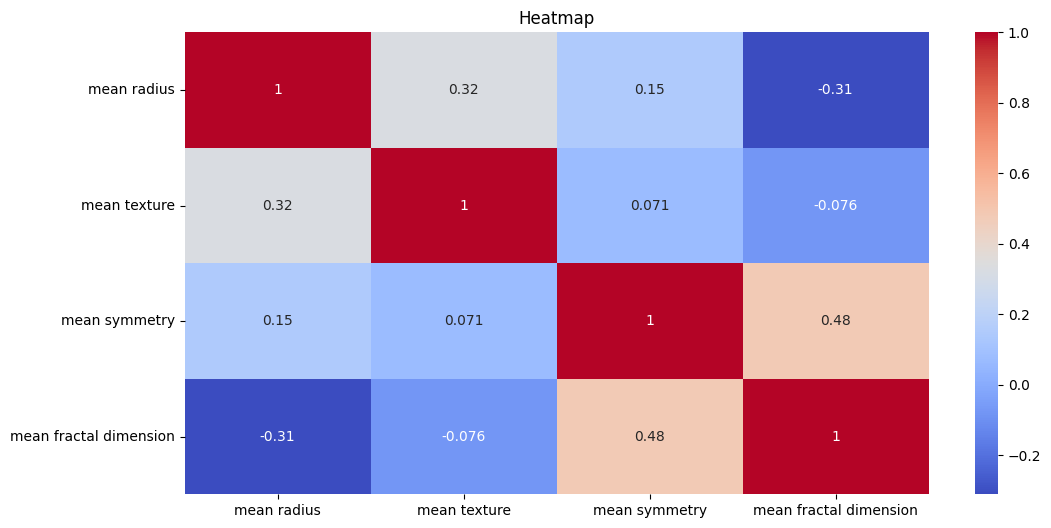

<Figure size 640x480 with 0 Axes>

In [1032]:
plt.figure(figsize=[12, 6])
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()
plt.clf()

In [1033]:
X

,mean radius,mean texture,mean symmetry,mean fractal dimension
0,17.99,10.38,0.2419,0.07871
1,20.57,17.77,0.1812,0.05667
2,19.69,21.25,0.2069,0.05999
3,11.42,20.38,0.2597,0.09744
4,20.29,14.34,0.1809,0.05883
...,...,...,...,...
564,21.56,22.39,0.1726,0.05623
565,20.13,28.25,0.1752,0.05533
566,16.60,28.08,0.1590,0.05648
567,20.60,29.33,0.2397,0.07016


In [1034]:
# standardize the X values by initalizing the StandardScaler then fit and transform the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [1035]:
X

array([[ 1.09706398e+00, -2.07333501e+00,  2.21751501e+00,
         2.25574689e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.39236330e-03,
        -8.68652457e-01],
       [ 1.57988811e+00,  4.56186952e-01,  9.39684817e-01,
        -3.98007910e-01],
       ...,
       [ 7.02284249e-01,  2.04557380e+00, -8.09117071e-01,
        -8.95586935e-01],
       [ 1.83834103e+00,  2.33645719e+00,  2.13719425e+00,
         1.04369542e+00],
       [-1.80840125e+00,  1.22179204e+00, -8.20069901e-01,
        -5.61032377e-01]])

In [1036]:
# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

In [1037]:
# make a LogisticRegression model, fit the training X and y values and then predict y values with using test x values
lrm = LogisticRegression(penalty=None, fit_intercept=True)
model = lrm.fit(X_train, y_train)
y_pred = np.where(model.predict_proba(X_test)[:, 1] > 0.50, 1, 0)
y_test, y_pred

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1]))

In [1038]:
# Evaluate the model by using from sklearn.metrics import confusion_matrix and accuracy_score
print(f'''The confusion matrix is below:\n\n{confusion_matrix(y_test, y_pred)}
\nThis represents the true positives, false positives in the first row, then false negatives and true negatives in the second row.\n''')

The confusion matrix is below:

[[32  7]
 [ 4 71]]

This represents the true positives, false positives in the first row, then false negatives and true negatives in the second row.



In [1039]:
print(f'The model is {round(100*accuracy_score(y_test, y_pred))}% accurate')
print(f'The model is {round(100*precision_score(y_test, y_pred))}% precise')
print(f'The model recall ratio is {round(100*recall_score(y_test, y_pred))}%')

The model is 90% accurate
The model is 91% precise
The model recall ratio is 95%
